# Imports

In [17]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from vega_datasets import data

# Data

In [18]:
cars = data.cars()
cars.tail()

# sorted(cars['Cylinders'].unique())

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
401,15.6,4,140.0,86.0,27.0,ford mustang gl,USA,2790,1982-01-01
402,24.6,4,97.0,52.0,44.0,vw pickup,Europe,2130,1982-01-01
403,11.6,4,135.0,84.0,32.0,dodge rampage,USA,2295,1982-01-01
404,18.6,4,120.0,79.0,28.0,ford ranger,USA,2625,1982-01-01
405,19.4,4,119.0,82.0,31.0,chevy s-10,USA,2720,1982-01-01


In [19]:
# view columns (copy and paste to make new dataframe)
cars.columns

Index(['Acceleration', 'Cylinders', 'Displacement', 'Horsepower',
       'Miles_per_Gallon', 'Name', 'Origin', 'Weight_in_lbs', 'Year'],
      dtype='object')

In [33]:
# new dataframe with only columns with numbers
cars = cars[['Acceleration', 'Cylinders', 'Displacement', 'Horsepower', 'Miles_per_Gallon', 'Weight_in_lbs']]
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Weight_in_lbs
0,12.0,8,307.0,130.0,18.0,3504
1,11.5,8,350.0,165.0,15.0,3693
2,11.0,8,318.0,150.0,18.0,3436
3,12.0,8,304.0,150.0,16.0,3433
4,10.5,8,302.0,140.0,17.0,3449


# Correlation

In [21]:
cars.corr()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Weight_in_lbs
Acceleration,1.000000,-0.522452,-0.557984,-0.697124,0.420289,-0.430086
Cylinders,-0.522452,1.000000,0.951787,0.844158,-0.775396,0.895220
Displacement,-0.557984,0.951787,1.000000,0.898326,-0.804203,0.932475
Horsepower,-0.697124,0.844158,0.898326,1.000000,-0.778427,0.866586
Miles_per_Gallon,0.420289,-0.775396,-0.804203,-0.778427,1.000000,-0.831741
Weight_in_lbs,-0.430086,0.895220,0.932475,0.866586,-0.831741,1.000000


In [22]:
cars.corr?

In [23]:
# correlation coefficent using scipy stats
from scipy import stats

stats.pearsonr(cars.Cylinders, cars.Acceleration)

(-0.5224515124210524, 8.183538342206756e-30)

In [24]:
from IPython.display import IFrame
wiki = IFrame(src='https://en.wikipedia.org/wiki/Pearson_correlation_coefficient', 
                       width=1000, 
                       height=400)
display(wiki)

# Seaborn Correlation Heatmap

Text(0.5, 1, 'Seaborn')

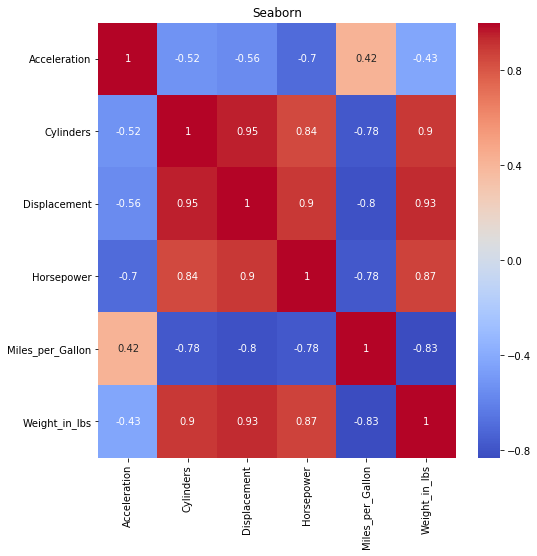

In [25]:
plt.figure(figsize=(8,8))
seaborn.heatmap(cars.corr(), annot=True, cmap="coolwarm").set_title('Seaborn')

# Seaborn Pairplot

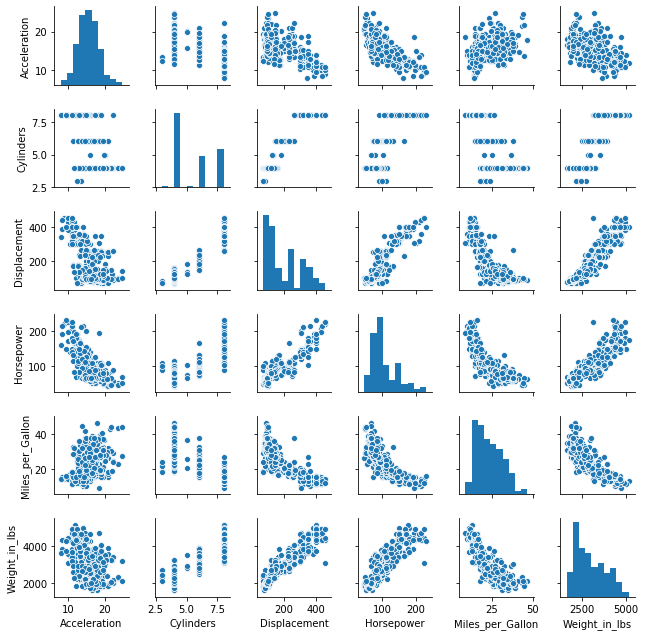

In [27]:
# compare pairplot and heatmap positive and negative correlations
cars_pairplot = cars.dropna()
# cars_pairplot.to_excel('path/cars.xlsx')

# seaborn.pairplot(cars_pairplot, height=1.5)
# ; gets rid of extra text that accompanies plot
seaborn.pairplot(cars_pairplot, size=1.5);

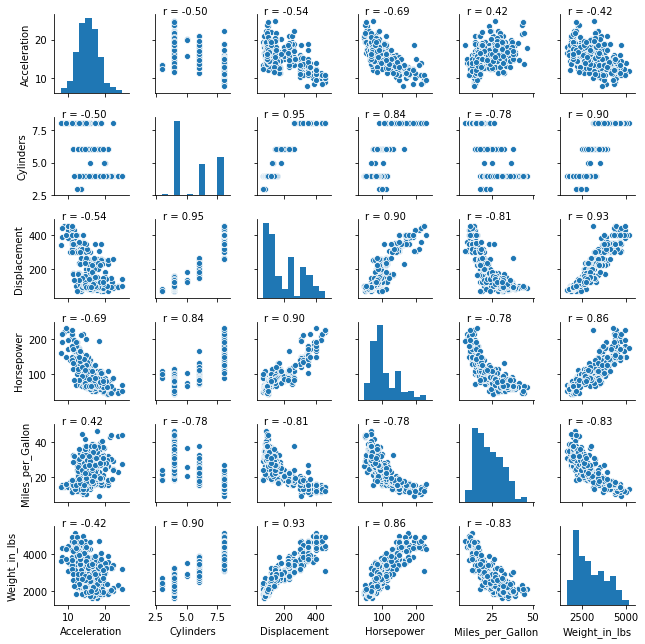

In [28]:
# add correlation coefficient to plot
from scipy import stats

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate('r = {:.2f}'.format(r), xy=(0.1, 1.0), xycoords=ax.transAxes)

# pair_plot = seaborn.pairplot(cars_pairplot, height=1.5)
pair_plot = seaborn.pairplot(cars_pairplot, size=1.5);
pair_plot.map_lower(corrfunc);
pair_plot.map_upper(corrfunc);

# Matplotlib Correlation Heatmap
Note: I have not worked with plt.matshow much but I believe it works also similar to plt.imshow

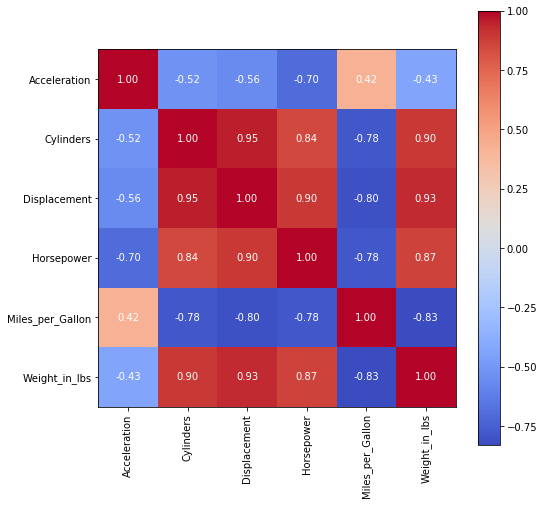

In [29]:
import matplotlib.pyplot as plt
plt.imshow(cars.corr(), cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(cars.columns)), cars.columns, rotation=90)
plt.yticks(range(len(cars.columns)), cars.columns)
plt.gcf().set_size_inches(8,8)

labels = cars.corr().values
for y in range(labels.shape[0]):
    for x in range(labels.shape[1]):
        plt.text(x, y, '{:.2f}'.format(labels[y, x]), ha='center', va='center', color='white')

# Correlation Matrix with Color Map / Heat Map

In [31]:
cars.corr().style.background_gradient(cmap='coolwarm')

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Weight_in_lbs
Acceleration,1,-0.522452,-0.557984,-0.697124,0.420289,-0.430086
Cylinders,-0.522452,1,0.951787,0.844158,-0.775396,0.89522
Displacement,-0.557984,0.951787,1,0.898326,-0.804203,0.932475
Horsepower,-0.697124,0.844158,0.898326,1,-0.778427,0.866586
Miles_per_Gallon,0.420289,-0.775396,-0.804203,-0.778427,1,-0.831741
Weight_in_lbs,-0.430086,0.89522,0.932475,0.866586,-0.831741,1
